<a href="https://colab.research.google.com/github/ParkHangah/AIFFEL_quest_eng/blob/master/Data_Analysis/DA01/D018_Nd09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 1. **당뇨병(diabetes) 수치 맞추기**

## 1-1. 기본 설계

### 1) 데이터 가져오기
* sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터를 사용
* diabetes의 data를 df_X에, target을 df_y에 저장

In [216]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_x = data.data
df_y = data.target

In [217]:
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [218]:
print(df_x[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


In [219]:
print(df_y[:5])

[151.  75. 141. 206. 135.]


### 2) 모델에 입력할 데이터 X,Y 준비하기
df_x와 df_y에 있는 값들을 numpy array로 변환해서 저장하기

In [220]:
import numpy as np

x = np.array(df_x[:, :])
y = np.array(df_y)

print(type(x), x.dtype)
print(type(y), y.dtype)

<class 'numpy.ndarray'> float64
<class 'numpy.ndarray'> float64


### 3)  train 데이터와 test 데이터로 분리하기

In [221]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


#### 코드 설명

* Scikit-learn은 파이썬에서 가장 널리 사용되는 머신러닝용 오픈소스 라이브러리
* model_selection은 Scikit-learn 라이브러리 내에 있는 서브 모듈(Sub-module) 중 하나로 모델을 선택하고 평가하기 위한 도구들을 모아놓은 곳
* train_test_split는 전체 데이터를 특정 비율에 따라 학습용(Train)과 테스트용(Test)으로 자동 분할해 줌

#### train_test_split

#### 파라미터
* test_size: 테스트 세트의 비율을 정합니다. (예: 0.2는 20%). 정수(int)를 넣으면 데이터의 절대 개수를 지정
* random_state: 데이터를 섞을 때 사용하는 난수 시드입니다. 숫자를 고정하면 코드를 다시 실행해도 똑같은 분할 결과가 나옵니다. (실험 재현성 확보)
#### 리턴값
* Numpy 배열(Array)이나 Pandas 데이터프레임 형태
#### 리턴으로 받은 객체에서 사용할 수 있는 속성(Numpy 배열일 때)
* .shape	데이터의 차원과 크기를 반환합니다. (행, 열)	(455, 30)
* .ndim	데이터의 차원 수를 반환합니다.	2 (2차원 평면)
* .size	데이터에 포함된 전체 요소(데이터 값)의 개수입니다.	13650
* .dtype	데이터 안에 들어있는 값들의 타입을 알려줍니다.	float64, int64
* .T	전치 행렬(Transpose)로, 행과 열을 바꾼 모습을 보여줍니다.

### 4) 모델 준비하기

In [222]:
# 가중치 w와 b를 준비
w = np.random.rand(x_train.shape[1])
b = np.random.rand()

print(len(w))

10


In [223]:
# 모델 구현. x값을 입력 받고 예측값을 리턴
def model(x, w, b):
    predictions = 0
    for i in range(len(w)):
        predictions += x[:, i] * w[i]
    predictions += b
    return predictions

### 5) 손실함수 loss 정의하기
* 손실함수를 MSE 함수로 정의

In [224]:
# 모델의 평가지표인 MSE 값을 구하는 함수 구현
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

# Loss 함수 구하기
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

### 6) 기울기를 구하는 gradient 함수 구현

In [225]:
def gradient(x, w, b, y):
  N = len(y)
  y_pred = model(x, w, b)
  dw = 1/N * 2 * x.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dw, db

### 7) 하이퍼 파라미터인 학습률 설정하기

In [230]:
LEARNING_RATE = 0.5

### 8) 모델 학습하기
* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [231]:
%%time

losses = []

for i in range(1, 2001):
    dw, db = gradient(x_train,w, b, y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x_train, w, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3002.7818
Iteration 200 : Loss 2966.3802
Iteration 300 : Loss 2943.3202
Iteration 400 : Loss 2928.4862
Iteration 500 : Loss 2918.7991
Iteration 600 : Loss 2912.3737
Iteration 700 : Loss 2908.0415
Iteration 800 : Loss 2905.0698
Iteration 900 : Loss 2902.9936
Iteration 1000 : Loss 2901.5147
Iteration 1100 : Loss 2900.4393
Iteration 1200 : Loss 2899.6400
Iteration 1300 : Loss 2899.0320
Iteration 1400 : Loss 2898.5581
Iteration 1500 : Loss 2898.1795
Iteration 1600 : Loss 2897.8690
Iteration 1700 : Loss 2897.6081
Iteration 1800 : Loss 2897.3832
Iteration 1900 : Loss 2897.1851
Iteration 2000 : Loss 2897.0068
CPU times: user 221 ms, sys: 0 ns, total: 221 ms
Wall time: 220 ms


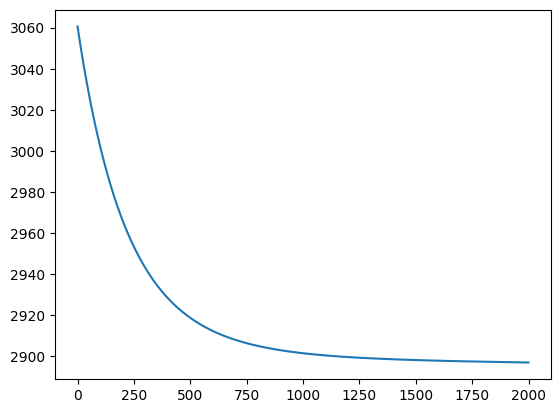

In [232]:
# 로스 값 시각화
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [233]:
# 현재 w, b 값 확인
print(w, b)

[  40.67623985 -239.13416025  554.20399474  341.57904265 -106.2750773
 -122.83830974 -212.56423434  151.14762899  417.6895804    64.3444283 ] 151.3023097180944


### 9) test 데이터에 대한 성능 확인하기

In [234]:
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
mse

np.float64(2882.4817280297775)

### 10) 정답데이터와 예측한 데이터 시각화 하기

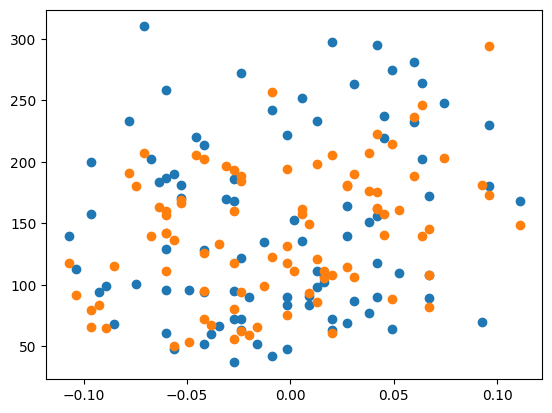

In [235]:
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], prediction)
plt.show()

## 1-2. 항목을 다변화 하면서 테스트

### (1) 'age', 'sex', 'bmi', 'bp' 만 적용

In [236]:
# df_x와 df_y에 있는 값들을 numpy array로 변환해서 저장하기
x = np.array(df_x[:, :4])
y = np.array(df_y)
print(type(x), x.dtype)
print(type(y), y.dtype)

# train 데이터와 test 데이터로 분리하기
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 가중치 w와 b를 준비
w = np.random.rand(x_train.shape[1])
b = np.random.rand()

print(len(w))

<class 'numpy.ndarray'> float64
<class 'numpy.ndarray'> float64
(353, 4) (353,)
(89, 4) (89,)
4


In [238]:
# 모델 학습
%%time

losses = []

for i in range(1, 2001):
    dw, db = gradient(x_train,w, b, y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x_train, w, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 4872.6670
Iteration 200 : Loss 4259.3430
Iteration 300 : Loss 3937.5217
Iteration 400 : Loss 3763.8864
Iteration 500 : Loss 3667.3182
Iteration 600 : Loss 3611.8994
Iteration 700 : Loss 3579.0998
Iteration 800 : Loss 3559.1185
Iteration 900 : Loss 3546.6257
Iteration 1000 : Loss 3538.6359
Iteration 1100 : Loss 3533.4263
Iteration 1200 : Loss 3529.9731
Iteration 1300 : Loss 3527.6520
Iteration 1400 : Loss 3526.0731
Iteration 1500 : Loss 3524.9877
Iteration 1600 : Loss 3524.2346
Iteration 1700 : Loss 3523.7077
Iteration 1800 : Loss 3523.3362
Iteration 1900 : Loss 3523.0723
Iteration 2000 : Loss 3522.8837
CPU times: user 196 ms, sys: 811 µs, total: 197 ms
Wall time: 255 ms


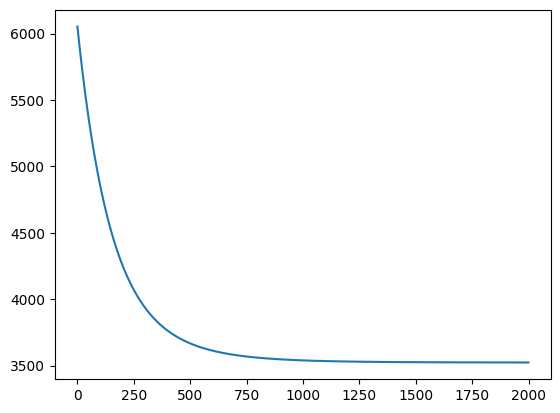

[ 66.29710979 -99.77669691 815.39868447 404.49925887] 151.76700657373868


In [239]:
# 로스 값 시각화
plt.plot(losses)
plt.show()
# 현재 w, b 값 확인
print(w, b)

In [240]:
# test 데이터에 대한 성능 확인하기
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
mse

np.float64(3708.9306786346106)

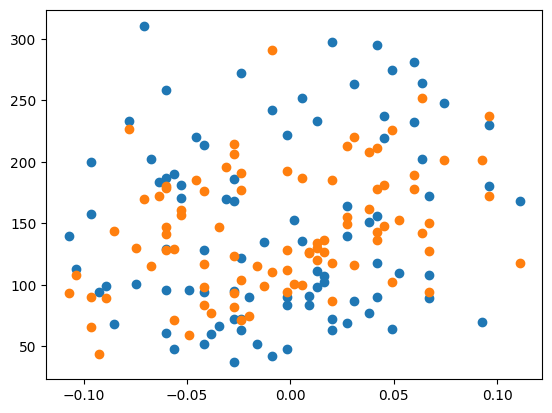

In [241]:
# 정답데이터와 예측한 데이터 시각화 하기
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], prediction)
plt.show()

### (2) age 랑 bmi만

In [246]:
# df_x와 df_y에 있는 값들을 numpy array로 변환해서 저장하기
x = np.array(df_x[:, :3:2])
y = np.array(df_y)
print(type(x), x.dtype)
print(type(y), y.dtype)

# train 데이터와 test 데이터로 분리하기
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 가중치 w와 b를 준비
w = np.random.rand(x_train.shape[1])
b = np.random.rand()

print(len(w))

<class 'numpy.ndarray'> float64
<class 'numpy.ndarray'> float64
(353, 2) (353,)
(89, 2) (89,)
2


In [247]:
# 모델 학습
%%time

losses = []

for i in range(1, 2001):
    dw, db = gradient(x_train,w, b, y_train)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x_train, w, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5211.9559
Iteration 200 : Loss 4682.0943
Iteration 300 : Loss 4355.2966
Iteration 400 : Loss 4152.7875
Iteration 500 : Loss 4026.6528
Iteration 600 : Loss 3947.6552
Iteration 700 : Loss 3897.8890
Iteration 800 : Loss 3866.3447
Iteration 900 : Loss 3846.2225
Iteration 1000 : Loss 3833.3023
Iteration 1100 : Loss 3824.9515
Iteration 1200 : Loss 3819.5184
Iteration 1300 : Loss 3815.9605
Iteration 1400 : Loss 3813.6159
Iteration 1500 : Loss 3812.0615
Iteration 1600 : Loss 3811.0249
Iteration 1700 : Loss 3810.3300
Iteration 1800 : Loss 3809.8617
Iteration 1900 : Loss 3809.5448
Iteration 2000 : Loss 3809.3293
CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 134 ms


In [248]:
# test 데이터에 대한 성능 확인하기
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
mse

np.float64(4042.4452525277648)

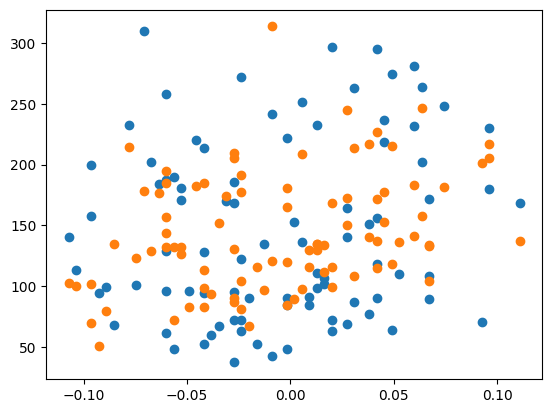

In [249]:

# 정답데이터와 예측한 데이터 시각화 하기
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], prediction)
plt.show()

# 프로젝트 2. **날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?**

* 캐글(Kaggle) 경진대회에서 제공하는 데이터셋 사용
* 데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제
* 자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.
* 이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것

## 1) 데이터 가져오기

In [250]:
# 구글 드라이브 연결
from google.colab import drive
from IPython.display import clear_output
import ipywidgets as widgets
import os

def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)

print("[0;33mConnecting...")
drive.mount('/content/gdrive')

mainpth="MyDrive"

clear_output()
inf('\u2714 Done','success', '50px')

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

In [251]:
import pandas as pd

train = pd.read_csv("/content/gdrive/MyDrive/#Study/Aiffel/Work/data_preprocess/bike-sharing-demand/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 데이터 필드 확인
* datetime - 시간별 날짜 + 타임스탬프  
* season -   1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
* holiday - 공휴일 여부 평일
* workingday - 주말 및 공휴일이 아닌 날 여부
* weather -   
1: 맑음, 구름 조금, 부분적으로 흐림, 부분적으로 흐림  
2: 안개 + 흐림, 안개 + 군데군데 흐림, 안개 + 구름 조금, 안개  
3: 약한 눈, 약한 비 + 천둥 + 흩어진 구름, 약한 비 + 흩어진 구름  
4: 폭우 + 우박 + 천둥 + 안개, 눈 + 박무
* temp - 섭씨 온도
* atemp - 체감 온도(섭씨)
* humidity - 상대 습도
* windspeed - 풍속
* casual - 등록되지 않은 사용자의 대여 건수
* registered - 등록된 사용자의 대여 건수
* count - 총 대여 건수

## 2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [252]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

## 3) year, month, day, hour, minute, second 데이터 개수 시각화하기

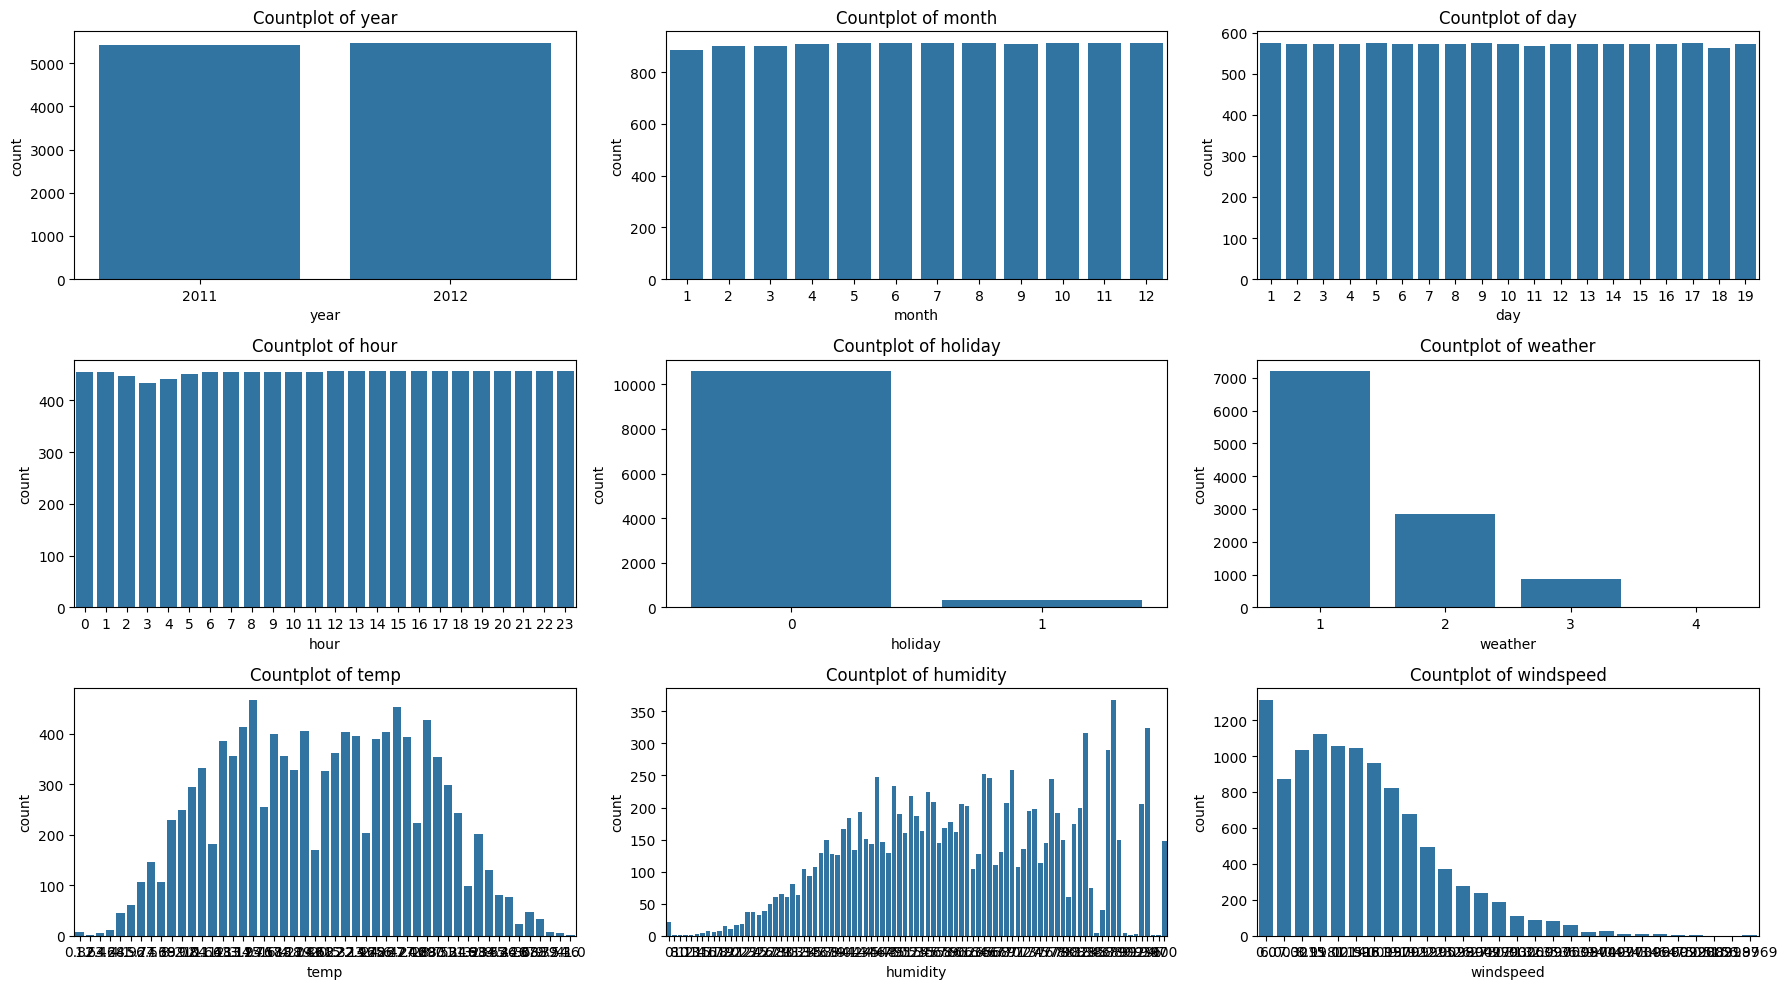

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'holiday', 'weather', 'temp', 'humidity', 'windspeed']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

## 4) X, y 컬럼 선택 및 train/test 데이터 분리

In [254]:
features = ['year', 'month', 'day', 'hour', 'holiday', 'weather', 'temp', 'humidity', 'windspeed']
tx = train[features]
ty = train['count']

from sklearn.model_selection import train_test_split
tx_train, tx_test, ty_train, ty_test = train_test_split(
    tx, ty, test_size=0.2, random_state=42
)

## 5) LinearRegression 모델 학습

In [ ]:
from sklearn.linear_model import LinearRegression

t_model = LinearRegression()
t_model.fit(tx_train, ty_train)

## 6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [256]:
from sklearn.metrics import mean_squared_error
import numpy as np

ty_pred = t_model.predict(tx_test)
mse = mean_squared_error(ty_test, ty_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19964.597213680117
RMSE: 141.29613304574232


## 7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

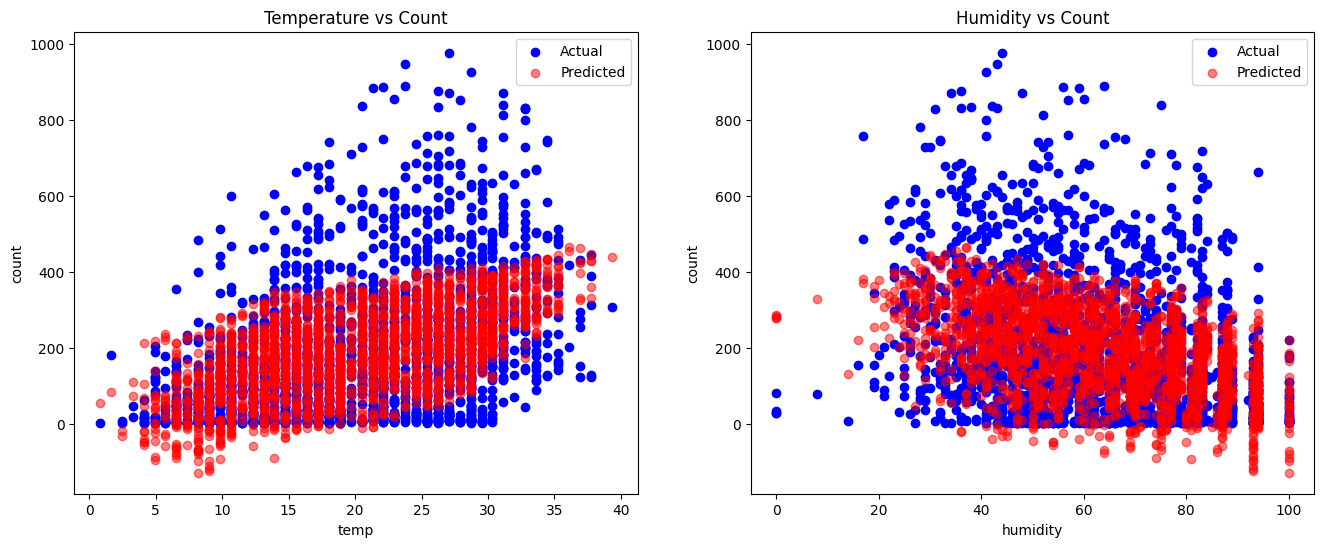

In [257]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(tx_test['temp'], ty_test, color='blue', label='Actual')
axs[0].scatter(tx_test['temp'], ty_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(tx_test['humidity'], ty_test, color='blue', label='Actual')
axs[1].scatter(tx_test['humidity'], ty_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()